In [14]:
import calendar
from datetime import datetime

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [15]:
from sklearn.preprocessing import StandardScaler

In [4]:
import gzip, csv
from itertools import islice

with gzip.open('../data/train.csv.gz') as f:
    reader = csv.DictReader(f)
    data = list(islice(reader, 2000))

In [29]:
train = pd.read_csv('../data/train.csv.gz', parse_dates=True)

In [32]:
datos_fuera = train[train.Y >= 90]
datos_fuera.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90


In [27]:
# Saco los 
train = train[train.Y < 90]

In [16]:
def get_dates(d):
    dt = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    return dt.hour, dt.month, dt.year

In [17]:
df = train[['PdDistrict']]
df['Day'] = train['DayOfWeek']
df['Hour'], df['Month'], df['Year'] = zip(*train['Dates'].apply(get_dates))

In [18]:
df['IsIntersection'] = train.Address.map(lambda x: '/' in x)

In [19]:
address_scaler = StandardScaler()
address_scaler.fit(train[['X', 'Y']])
train[['X', 'Y']] = address_scaler.transform(train[['X', 'Y']])

In [170]:
df.head()

,PdDistrict,Day,Hour,Month,Year,IsIntersection
0,NORTHERN,Wednesday,23,5,2015,True
1,NORTHERN,Wednesday,23,5,2015,True
2,NORTHERN,Wednesday,23,5,2015,True
3,NORTHERN,Wednesday,23,5,2015,False
4,PARK,Wednesday,23,5,2015,False


In [161]:
df.IsIntersection.head()

0     True
1     True
2     True
3    False
4    False
Name: Address, dtype: bool

In [20]:
%matplotlib inline

def graph_bars(items, width=16, alt_labels=None):
    labels, counts = np.unique(items, return_counts=True)
    index = np.arange(len(counts))
    plt.figure(figsize=(width,6))
    plt.bar(index, counts, 1, alpha=0.4, color='y', label='Bars')
    plt.xticks(index + 0.5, alt_labels or labels, rotation=70)
    return plt

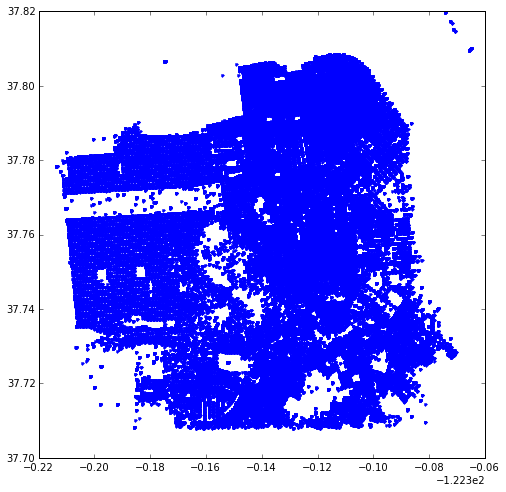

In [28]:
plt.figure(figsize=(8, 8))
plt.plot(train["X"], train["Y"], '.b')
plt.show()

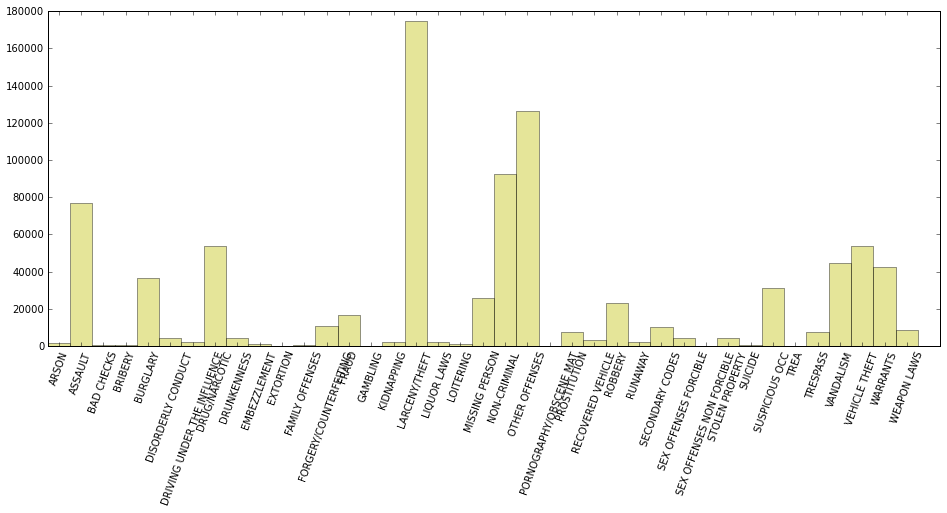

In [155]:
graph_bars(train.Category).show()

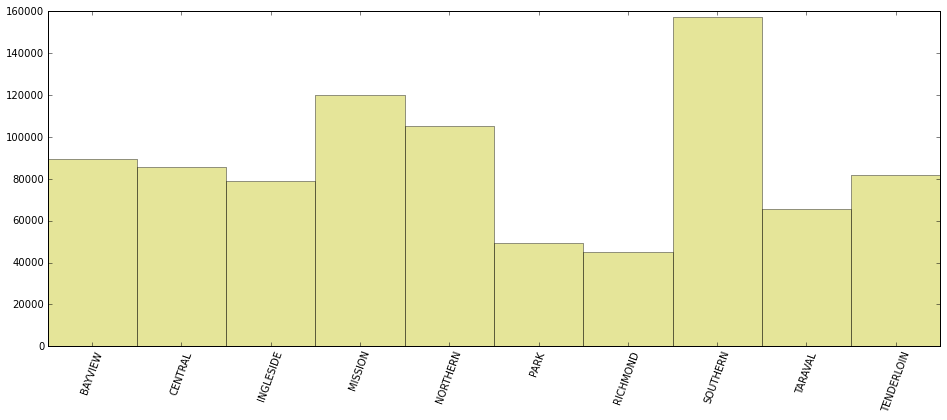

In [153]:
graph_bars(df.PdDistrict).show()

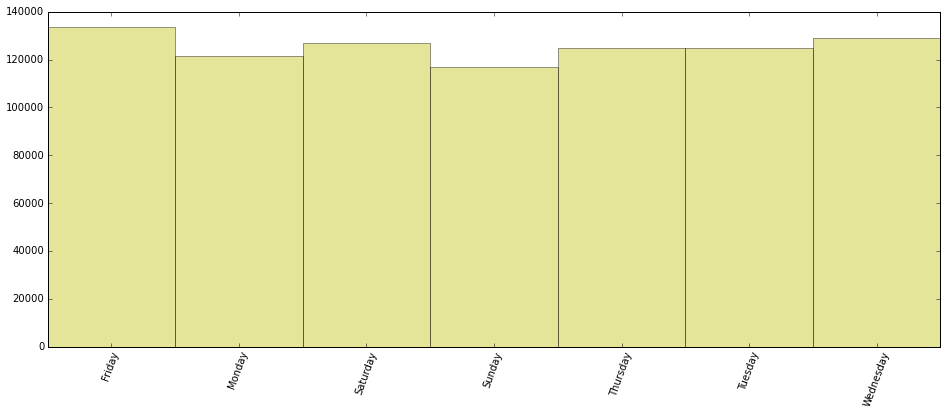

In [151]:
graph_bars(df.Day).show()

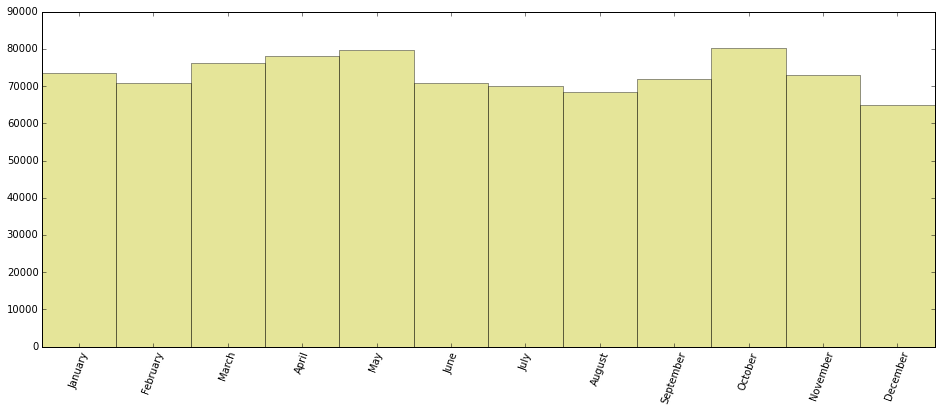

In [121]:
graph_bars(df.Month, alt_labels=calendar.month_name[1:]).show()

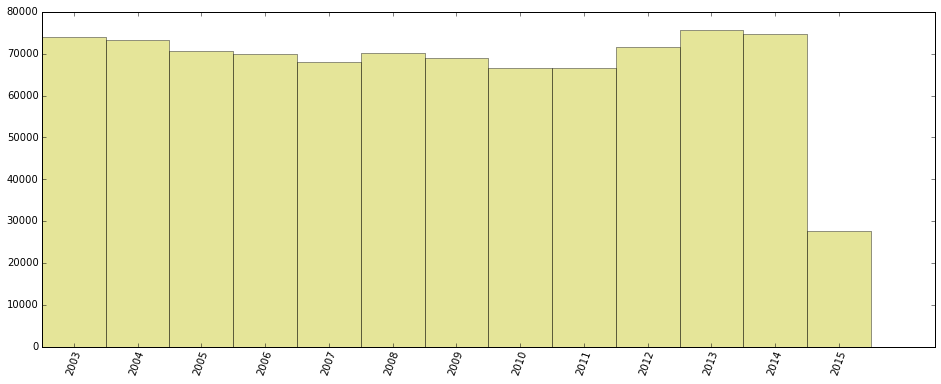

In [21]:
graph_bars(df.Year).show()

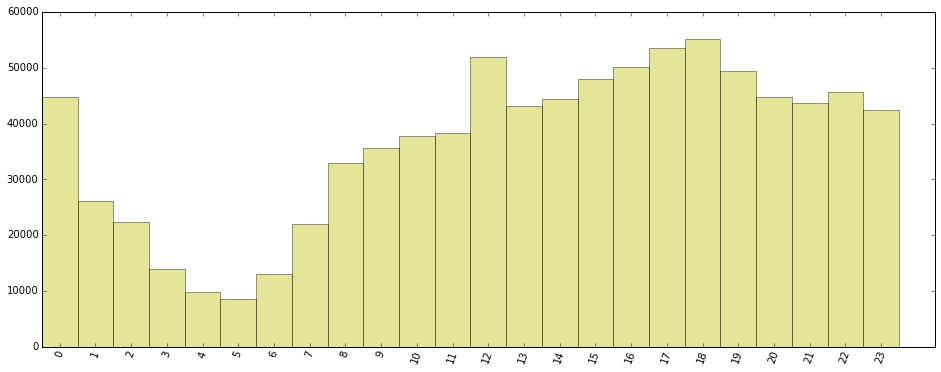

In [22]:
graph_bars(df.Hour).show()

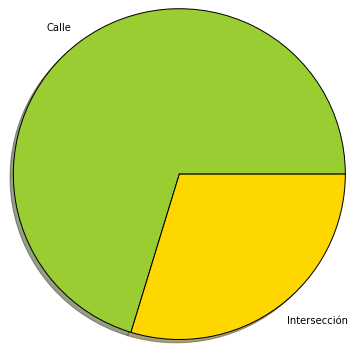

In [171]:
#
labels, count = np.unique(df.IsIntersection, return_counts=True)
labels = [u'Intersección' if x else u'Calle' for x in labels]

plt.figure(figsize=(6,6))
pie, _ = plt.pie(count, colors=['yellowgreen', 'gold'], labels=labels, shadow=True)
plt.axis('equal')
plt.show()